## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [10]:
# you code here
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from icecream import ic
from sklearn.linear_model import LinearRegression

In [15]:
# %matplotlib inline
random_data = np.random.random((50, 2))
X = random_data[:, 0]
Y = random_data[:,1]


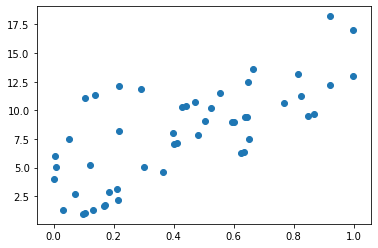

In [17]:
def assmuing_function(x):
    return 10 * x + 5 + random.randint(-5, 5)
y = [assmuing_function(x) for x in X]
plt.scatter(X, y)

In [18]:
y = np.array(y)
reg = LinearRegression().fit(X.reshape(-1, 1), y)
print('回归线的k值是: {0}'.format(reg.coef_))
print('回归线的截距b是: {0}'.format(reg.intercept_))
print('回归线的R^2是: {0}'.format(reg.score(X.reshape(-1, 1), y)))

回归线的k值是: [10.16767424]
回归线的截距b是: 3.6478918335599086
回归线的R^2是: 0.5140193310557182


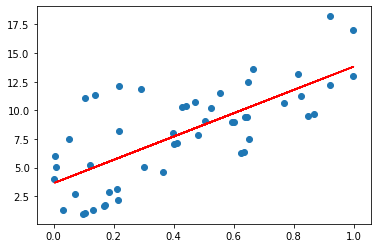

In [19]:
### function of predicting new data
def regression_value(x):
    return reg.coef_ * x + reg.intercept_
plt.scatter(X, y)
plt.plot(X, regression_value(X), color = 'red')

In [21]:
regression_value([0.2])

array([5.68142668])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [22]:
# you code here
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [23]:
from scipy.spatial.distance import cosine
def distance(x1, x2):
    return cosine(x1, x2)

In [24]:
def predict(x, k=5):
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    return np.mean([i[1] for i in most_similars])
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 

In [26]:
predict(0.2,3)

10.63825186999771

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [13]:
# you code here
from collections import Counter
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

In [14]:
from icecream import ic
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
   # ic(x_fields)
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
      #  ic(f)
        values = set(training_data[f])
      #  ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
           # ic(sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
           # ic(entropy_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
           # ic(sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
           # ic(entropy_2)
            entropy_v = entropy_1 + entropy_2
           # ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [21]:
#生成决策树
def decision_tree(training_data: pd.DataFrame, target: str) -> str:
    spliter = find_the_min_spilter(training_data, target)
    sub_tree = training_data[training_data[spliter[0]]!=spliter[1]]
    ic(sub_tree)
    if len(set(training_data[spliter[0]])) != 1:
        return decision_tree(sub_tree, target)

In [16]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [22]:
decision_tree(dataset, 'bought')

ic| sub_tree:   gender income  family_number  bought
              0      F    +10              1       1
              1      F    -10              1       1
              3      F    +10              1       0
              4      M    +10              1       0
              5      M    +10              1       0
ic| sub_tree:   gender income  family_number  bought
              0      F    +10              1       1
              3      F    +10              1       0
              4      M    +10              1       0
              5      M    +10              1       0
ic| sub_tree: 

spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565
spliter is: ('income', '-10')
the min entropy is: 0.5623351446188083
spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


Empty DataFrame
              Columns: [gender, income, family_number, bought]
              Index: []


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [54]:
from sklearn.cluster import KMeans
import random
from collections import defaultdict
import matplotlib.pyplot as plt

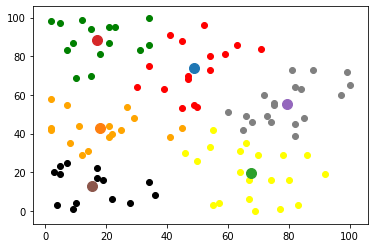

In [55]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

training_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster = KMeans(n_clusters=6, max_iter=500)
cluster.fit(training_data)
centers = defaultdict(list)
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)


## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:模型是对特定类型数据规律的总结和描述；现实世界异常复杂，模型不可能完全准确全面的描述现实世界，但有些模型可以从某一方面相对正确的描述出现实世界。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
过拟合：模型在训练集表现很好，在测试集表现很差；
过拟合原因：模型太过复杂，特征过多，训练过度等。
欠拟合：模型在训练集和测试集上表现均很差；
欠拟合原因：模型太简单，数量太小，数据分布不对，系数过大等。

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:

TP、True Positive  真阳性：预测为正，实际也为正

FP、False Positive  假阳性：预测为正，实际为负

FN、False Negative 假阴性：预测与负、实际为正

TN、True Negative 真阴性：预测为负、实际也为负。

precision（精确率）：被预测为正例的样本中，真实的正例所占的比例,强调查准率；precision=TP/TP+FP。

recall（召回率）：真实的正例样本中，被预测为正例的样本所占的比例，强调查全率；recall=TP/TP+FN。

$$ F-score = (1 + \beta^2) * \frac{Precision*Recall}{\beta^2*Precision + Recall} $$

F1-score ：兼顾精准率与召回率的模型评价指标,是精确率和召回率的平衡。F1=2*precision*recall/precision+recall。

F2-score：当F1-Score时召回率和精确率都很重要，权重相同。当有些情况下,我们认为精确率更为重要，那就调整 β 的值小于 1 ，如果我们认为召回率更加重要，那就调整 β的值大于1，比如F2-Score,F2=5*precision*recall/4*precision+recall。

ROC(receiver operating characteristic curve)是一条曲线，其横轴表示的是FPR(False Positive Rate)——错误地预测为正例的概率，纵轴表示的是TPR(True Positive Rate)——正确地预测为正例地概率。AUC(area under curve)是一个数值，从定义上可以直观的看到其表征的意思——曲线与坐标轴围成的面积，ROC-AUC即表示的是ROC曲线与坐标轴围成的面积。




<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习是在大量数据基础上，利用计算机学习其中的数据规律，并利用规律归纳现有数据或者预测未来数据的趋势。

机器学习是数据驱动，传统编程是规则驱动。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans：认可该观点。正确定义了机器学习模型的评价标准，也就明确了需求和目标，后续工作只是如何寻找更多有用的数据拟合更高效的模型。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [28]:
# you code here
from collections import Counter
import numpy as np
import pandas as pd
from icecream import ic
import operator

#计算信息熵
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

#计算条件熵，选择最优先特征点
def find_the_min_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}

    spliter = None
    min_entropy = float('inf') #正无穷

    for f in x_fields:
        values = set(training_data[f])
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            entropy_1 = entropy(sub_spliter_1)
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            entropy_2 = entropy(sub_spliter_2)
            entropy_v = entropy_1 + entropy_2
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    return spliter


#生成决策树
def create_tree(dataset, target):

    spliter=find_the_min_spilter(dataset,target)
    tree={spliter[0]:{}}

    if len(set(dataset[spliter[0]])) == 1:
        tree = dataset[dataset[spliter[0]]==spliter[1]][target]
        ic(spliter[0])
        ic(spliter[1])
        ic(dataset[dataset[spliter[0]]==spliter[1]][target])

    if len(set(dataset[spliter[0]])) > 1:
        for v in set(dataset[spliter[0]]):
            sub_data = dataset[dataset[spliter[0]] == v]
            tree[spliter[0]][v]=create_tree(sub_data, target)

    return tree

#预测
def predicate(decision_tree, gender, income, family_number):
    for key in decision_tree[tuple(decision_tree.keys())[0]].keys():
        if key in (gender, income, family_number):
            subtree = decision_tree[tuple(decision_tree.keys())[0]][key]
            if subtree == 1 or subtree == 0:
                return subtree
            else:
                prdc = predicate(subtree, gender, income, family_number)
                return prdc

mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 3, 1, 2],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)
D_tree = create_tree(dataset, 'bought')
ic(D_tree)

## 遇到一些问题
p_1 = predicate(D_tree, 'M', '-10', 1)
print("p_1",p_1)


ic| spliter[0]: 'family_number'
ic| spliter[1]: 1
ic| dataset[dataset[spliter[0]]==spliter[1]][target]: 0    1
                                                      3    0
                                                      5    0
                                                      Name: bought, dtype: int64
ic| spliter[0]: 'family_number'
ic| spliter[1]: 1
ic| dataset[dataset[spliter[0]]==spliter[1]][target]: 1    1
                                                      Name: bought, dtype: int64
ic| spliter[0]: 'family_number'
ic| spliter[1]: 2
ic| dataset[dataset[spliter[0]]==spliter[1]][target]: 2    1
                                                      6    1
                                                      Name: bought, dtype: int64
ic| spliter[0]: 'family_number'
ic| spliter[1]: 3
ic| dataset[dataset[spliter[0]]==spliter[1]][target]: 4    0
                                                      Name: bought, dtype: int64
ic| D_tree: {'family_number': {1: {'income': {'+1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [3]:
# you code here
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import random
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
#define target function
def price(rm, k, b):
    return k * rm + b

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 $$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [5]:
# 平方损失函数
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

# 平方损失函数偏导-k
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

# 平方损失函数偏导-b
def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

$$ loss = \frac{1}{n} \sum{\lvert{(y_i - \hat{y_i})}\rvert} 
$$$$ loss = \frac{1}{n} \sum{\lvert{(y_i - (k*x_i + b_i))}\rvert} $$

$$ \frac{\partial{loss}}{\partial{k}} = \frac{1}{n}\sum(\lvert{x_i}\rvert)$$

$$ \frac{\partial{loss}}{\partial{b}} = 1$$

In [6]:
#绝对值损失函数
def loss_abs(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

#绝对值损失函数偏导-k
def partial_derivative_k_abs(x, y, y_hat):
    sum = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i >= y_hat_i:
            sum -=  x_i
        else:
            sum +=  x_i
    return sum/(len(list(y)))

#绝对值损失函数偏导-b
def partial_derivative_b_abs(y, y_hat):
    sum = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i >= y_hat_i:
            sum -= 1
        else:
            sum += 1
    return sum / (len(list(y)))

Iteration 1999, the loss is 53.562827328762694, parameters k is -3 and b is -6
 
Iteration 1999, the loss is 5.208611723371818, parameters k is -3 and b is -6


Text(0.5, 1.0, '绝对值损失函数拟合效果')

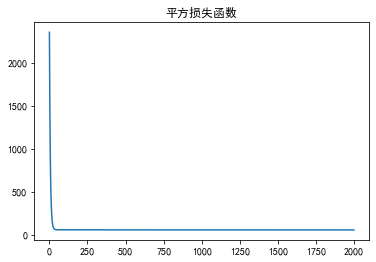

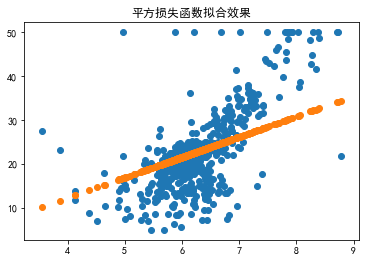

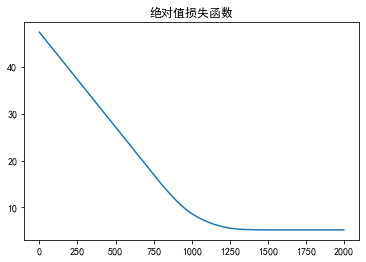

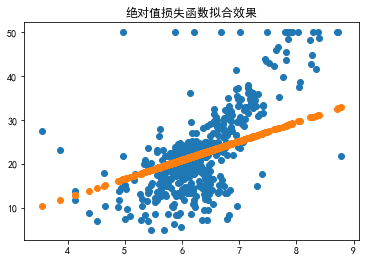

In [12]:
#数据加载
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

# 初始化
k = random.randint(-10, 10)
b = random.randint(-10, 10)

k_temp = k
b_temp = b

learning_rate = 1e-3
iteration_num = 2000
losses = []

# MSE
for i in range(iteration_num):
    price_use_current_parameters = [price(r, k_temp, b_temp) for r in X_rm]  # \hat{y}

    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
   # print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)

    # gradient descent
    k_temp = k_temp + (-1 * k_gradient) * learning_rate
    b_temp = b_temp + (-1 * b_gradient) * learning_rate
best_k = k_temp
best_b = b_temp
print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))

plt.figure(1)
plt.plot(list(range(iteration_num)),losses)
plt.title('平方损失函数')

price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.figure(2)
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_best_parameters)
plt.title('平方损失函数拟合效果')
print(' ')

#绝对值损失函数
k_temp = k
b_temp = b
losses = []
for i in range(iteration_num):
    price_use_current_parameters = [price(r, k_temp, b_temp) for r in X_rm]  # \hat{y}

    current_loss = loss_abs(y, price_use_current_parameters)
    losses.append(current_loss)
  #  print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    k_gradient = partial_derivative_k_abs(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b_abs(y, price_use_current_parameters)

    # gradient descent
    k_temp = k_temp + (-1 * k_gradient) * learning_rate
    b_temp = b_temp + (-1 * b_gradient) * learning_rate
best_k = k_temp
best_b = b_temp
print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))

plt.figure(3)
plt.plot(list(range(iteration_num)),losses)
plt.title('绝对值损失函数')
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]
plt.figure(4)
plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_best_parameters)
plt.title('绝对值损失函数拟合效果')

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)